 **The Sparks Foundation: GRIP 2021**

**Data Science and Business Analytics Intern**

*Author: Rudra Tambe*

**Task 2: Prediction using Unsupervised ML**

From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

**Importing Libraries**

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import seaborn as sns

**Importing The Dataset**

In [103]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Exploration**

In [104]:
dataset.shape

(150, 6)

In [105]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [106]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [107]:
dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [108]:
dataset['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [109]:
dataset['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [110]:
dataset.drop(columns=["Id","Species"],axis=1,inplace=True)

In [111]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Data Visualization**

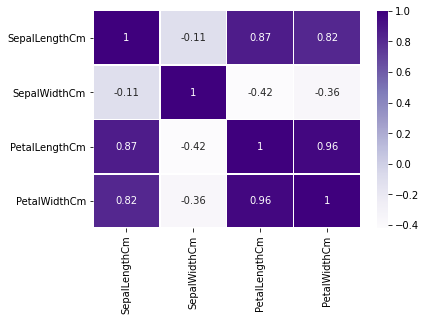

In [112]:
sns.heatmap(dataset.corr(), cmap = 'Purples', annot = True, linewidth = 0.5)

**Finding the optimum number of clusters for K-Means and determining the value of K.**

In [113]:
from sklearn.cluster import KMeans
wcss=[] # List for saving the values of Within-Cluster sum of squares
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_) # To obtain the within cluster sum of square

**Plotting the results onto a line graph,allowing us to observe 'The elbow'**

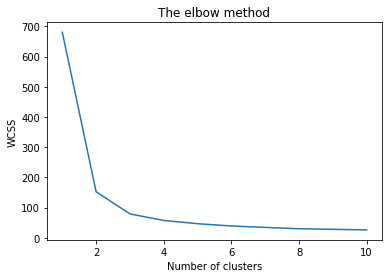

In [114]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [115]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(dataset)

In [116]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

*The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
From this we choose the number of clusters as 3.*


**Visualising the clusters**

Text(0.5, 1.0, 'K-Means Clustering')

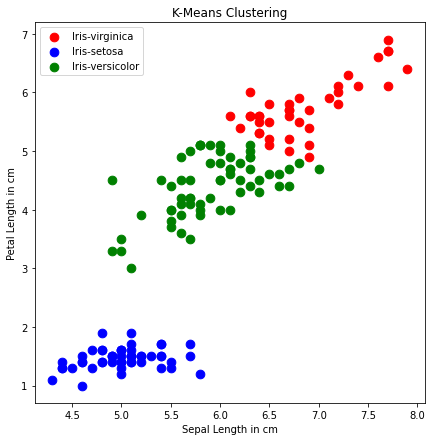

In [117]:
plt.figure(figsize=(7,7))
plt.scatter(dataset.iloc[y_kmeans==0,0],dataset.iloc[y_kmeans==0,2],s=75,c='red',label='Iris-virginica')
plt.scatter(dataset.iloc[y_kmeans==1,0],dataset.iloc[y_kmeans==1,2],s=75,c='blue',label='Iris-setosa')
plt.scatter(dataset.iloc[y_kmeans==2,0],dataset.iloc[y_kmeans==2,2],s=75,c='green',label='Iris-versicolor')
plt.legend()
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.title('K-Means Clustering')

**Plotting the centroids of the clusters**

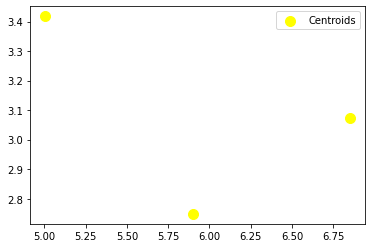

In [118]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Hence, we got optimum number of clusters of iris dataset is 3 and also visualized the clusters with the help of scatter plot.

**Thank You**